# Rent in accra



<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Cleaning (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

## Project Objectives

* Clean the dataset to the point where it can be used effectively for model design 


## Definition of Data Features



1. Title
2. Location
3. Price


 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we would import, and briefly discuss, the libraries that will be used throughout our analysis and modelling. |

---

### Import the packages that are neccessary to carry out the stated objectives of the project

In [779]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np # for linear algebra
import pandas as pd # Data processing, CSV file importation

# Libraries for data preparation and model building

#Machine learning performance libraries
from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


##Machine Learning Model Libraries
from sklearn.linear_model import *
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

#other packages
from datetime import datetime
import re
import handcalcs.render

#Visualization Packages
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import matplotlib.pyplot as plt

#Statistics Libraries
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from statsmodels.graphics.correlation import plot_corr
from math import sqrt
from numpy import hstack
from numpy import vstack
from numpy import asarray

import warnings
warnings.filterwarnings('ignore')

# Set option to display all columns
pd.set_option('display.max_colwidth', None)


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we load the data from the `df` file into a DataFrame. |

---

To begin loading our data, we need to make sure that the raw data and the notebook file are both in the same folder on our local machine. Both the train and test data sets will be loaded into our notebook using the code below. If the files aren't in the same folder, we'll have to point to the directory where the file is stored on our machine or on the cloud. It is a good practice to call up the loaded data once it has been loaded to ensure that the data has loaded correctly.

In [780]:
# load the train data
train_data = df = pd.read_csv('Rent_in_Greater_Accra.csv') 
df.head()

,Title,location,Price
0,"\n 1bdrm Apartment in Sam Properties, Ga West Municipal for Rent\n",\n Ga West Municipal\n,\n 650\n
1,\n 2bdrm Apartment in Oyarifa for Rent\n,\n Oyarifa\n,"\n 1,500\n"
2,\n 2bdrm Apartment in Oyarifa for rent\n,\n Oyarifa\n,"\n 1,500\n"
3,\n 3bdrm Apartment in Oyarifa for Rent\n,\n Oyarifa\n,"\n 2,500\n"
4,\n 3bdrm Apartment in East Legon for Rent\n,\n East Legon\n,"\n 3,000\n"




### Dataset summary
It is important to identify the columns that have null entries as null values can affect the performance of our model. The "isnull" function shows the number of null values that are contained in each column of the dataset. This data set is relatively clean 
Pandas dataframe.info() function is used to get a concise summary of the dataframe

In [781]:
def Summary(df):
    i = df.info()
    print ("NUL Values")
    n = df.isna().sum()
    return i,n

In [782]:
Summary(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     1275 non-null   object
 1   location  1275 non-null   object
 2   Price     1275 non-null   object
dtypes: object(3)
memory usage: 30.0+ KB
NUL Values


(None,
 Title       0
 location    0
 Price       0
 dtype: int64)

### Check the "Shape" of the data-sets
The data has been split into two sets, as evidenced by the form of both datasets. Seventy-five percent of the data is designated as train data, whereas twenty-five percent is designated as test data. The shape also reveals that the training data set includes 49 columns, whereas the test data set only has 48. The column that our model is supposed to predict is the one that is absent from the test set. We may find that specific object by looking for the entity (Column) that is missing from the test data set. That column can be identified as the load shortfall 3hr column after looking at both datasets.

In [783]:
df.shape

(1275, 3)

<a id="three"></a>
## 3. Data Cleaning (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

| ⚡ Description: Data Cleaning ⚡ |
| :--------------------------- |
| In this section, we are required to perform an in-depth analysis of all the variables in the DataFrame. |

In [784]:
#Extracting the price collumn from the title
df['Price'] = df['Price'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df.tail()

,Title,location,Price
1270,"\n 4bdrm Townhouse/Terrace in Seekers Realty, US Embassy Area for Rent\n","\n Cantonments, US Embassy Area\n",19000
1271,"\n 2bdrm Apartment in Adom Agency, New Town for Rent\n","\n Teshie, Teshie New Town\n",1200
1272,\n 5 Bedroom Semi Detached House at Airport for Rent\n,\n Airport Residential Area\n,24000
1273,"\n 2bdrm Apartment in Max Properties, East Legon for Rent\n",\n East Legon\n,4880
1274,"\n 4bdrm House in Fear Not, Accra Metropolitan for Rent\n",\n Accra Metropolitan\n,3500


In [785]:
#removing "\n" from the title
df = df.replace(r'\n',' ', regex=True) 
df.head()

,Title,location,Price
0,"1bdrm Apartment in Sam Properties, Ga West Municipal for Rent",Ga West Municipal,650
1,2bdrm Apartment in Oyarifa for Rent,Oyarifa,1500
2,2bdrm Apartment in Oyarifa for rent,Oyarifa,1500
3,3bdrm Apartment in Oyarifa for Rent,Oyarifa,2500
4,3bdrm Apartment in East Legon for Rent,East Legon,3000


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we would be: cleaning the dataset, and possibly create new features - as identified in the EDA phase. |

---

### 4.1 The Importance of Feature Engineering in data science?
In Data Science, the quality of data input into a model determines the model's performance. Data preprocessing and data handling are commonly used to improve data quality. Let's say we develop a model without engineering the data and attain a 40 percent accuracy. The model's performance can be improved by up to 70% or more by doing feature engineering on the same data before feeding it to the model.

Simply, by using Feature Engineering we improve can the performance of the model greatly. As we saw in the previous section (EDA), we highlighted some columns to be dropped as well as columns with categorical values.

We will now do the following:

In [786]:
#extracting 
df['Rooms'] = df['Title'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
# #convert the Romss colum to string
df['Rooms'] = df['Rooms'].astype(str)
# extracting the first number
df['Rooms'] = df['Rooms'].str.extract('(\d{,1})')
df["Rooms"] = pd.to_numeric(df["Rooms"])
# df.loc[df['Rooms'] > 10]

In [787]:
Summary(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     1275 non-null   object 
 1   location  1275 non-null   object 
 2   Price     1275 non-null   int32  
 3   Rooms     1265 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 35.0+ KB
NUL Values


(None,
 Title        0
 location     0
 Price        0
 Rooms       10
 dtype: int64)

In [788]:
df.head(290)

,Title,location,Price,Rooms
0,"1bdrm Apartment in Sam Properties, Ga West Municipal for Rent",Ga West Municipal,650,1.0
1,2bdrm Apartment in Oyarifa for Rent,Oyarifa,1500,2.0
2,2bdrm Apartment in Oyarifa for rent,Oyarifa,1500,2.0
3,3bdrm Apartment in Oyarifa for Rent,Oyarifa,2500,3.0
4,3bdrm Apartment in East Legon for Rent,East Legon,3000,3.0
...,...,...,...,...
285,5bdrm House in East Legon for Rent,East Legon,19000,5.0
286,"Furnished 5bdrm Mansion in Delight Agency, Cantonments for Rent",Cantonments,29000,5.0
287,5bdrm House in East Legon for Rent,East Legon,15000,5.0
288,Executive 2 Bedroom Apartment for Rent at Community 25 HFC,Ga East Municipal,3500,2.0


In [789]:
#identify the empty columns
df[df['Rooms'].isna()]

,Title,location,Price,Rooms
289,Four Bedrooms House for Rent,East Legon,7600,NaN
363,Executive Newly Six Bedroom for Rent,East Legon,14500,NaN
398,Executive Newly Built House For Rent At East Legon Hills,East Legon,2500,NaN
603,Newly Built Four Bedroom Five Washrooms At East Legon Hills,East Legon,2200,NaN
747,Exec Four Bedroom House for Rent at Westland,Ga East Municipal,8400,NaN
988,Penthouse for Rent at Trade Fair,Airport Residential Area,4500,NaN
1036,Five Bedroom House At East Legon Hills For Rent,East Legon,8650,NaN
1134,Furnished Executive Four Bedroom House for Rent at East Airp,Accra Metropolitan,25000,NaN
1194,Apartment,East Legon,6240,NaN
1243,"Furnished Mini Flat in Chamber Self One, Ga South Municipal for Rent",Ga South Municipal,400,NaN


In [790]:
#insrting values into the nan rows
x = {'Four': "4", 'Six': "6", 'Five': "5", 'Six': "6", "Penthouse for Rent at Trade Fair": "2",
     "Executive Newly Built House For Rent At East Legon Hills": "3", "Apartment": "3"}
m = df['Rooms'].isna()
# df["Rooms"] = pd.to_numeric(df["Rooms"])
def f(y): return ','.join(x[z] for z in y.split(' ') if z in x)

df.loc[m, 'Rooms'] = df.loc[m, 'Title'].apply(f)


In [791]:
# droping empty rows in price
df = df.drop(labels=398, axis=0)
df = df.drop(labels=988, axis=0)
df = df.drop(labels=1243, axis=0)

In [792]:
#checking if nan values have been filled
df.head(290)

,Title,location,Price,Rooms
0,"1bdrm Apartment in Sam Properties, Ga West Municipal for Rent",Ga West Municipal,650,1.0
1,2bdrm Apartment in Oyarifa for Rent,Oyarifa,1500,2.0
2,2bdrm Apartment in Oyarifa for rent,Oyarifa,1500,2.0
3,3bdrm Apartment in Oyarifa for Rent,Oyarifa,2500,3.0
4,3bdrm Apartment in East Legon for Rent,East Legon,3000,3.0
...,...,...,...,...
285,5bdrm House in East Legon for Rent,East Legon,19000,5.0
286,"Furnished 5bdrm Mansion in Delight Agency, Cantonments for Rent",Cantonments,29000,5.0
287,5bdrm House in East Legon for Rent,East Legon,15000,5.0
288,Executive 2 Bedroom Apartment for Rent at Community 25 HFC,Ga East Municipal,3500,2.0


In [793]:
#from line 603 we see some values in the rooms column have 2 figures
df.head(604)

,Title,location,Price,Rooms
0,"1bdrm Apartment in Sam Properties, Ga West Municipal for Rent",Ga West Municipal,650,1.0
1,2bdrm Apartment in Oyarifa for Rent,Oyarifa,1500,2.0
2,2bdrm Apartment in Oyarifa for rent,Oyarifa,1500,2.0
3,3bdrm Apartment in Oyarifa for Rent,Oyarifa,2500,3.0
4,3bdrm Apartment in East Legon for Rent,East Legon,3000,3.0
...,...,...,...,...
600,"3bdrm House in Community 20, Spintex for Rent",Spintex,4000,3.0
601,"2bdrm Apartment in Pejei Consult, Accra Metropolitan for rent",Accra Metropolitan,700,2.0
602,"4bdrm House in Praemus Properties, American House for Rent","East Legon, American House",6000,4.0
603,Newly Built Four Bedroom Five Washrooms At East Legon Hills,East Legon,2200,"4,5"


In [794]:
#extracting the first 2 element of the column
df['Rooms'] = df.Rooms.astype(str).str[:2]

In [795]:
# extracting the numbers to get rid of the comma
df['Rooms'] = df['Rooms'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [796]:
#checking if line 603 is fixed
df.head(604)

,Title,location,Price,Rooms
0,"1bdrm Apartment in Sam Properties, Ga West Municipal for Rent",Ga West Municipal,650,1
1,2bdrm Apartment in Oyarifa for Rent,Oyarifa,1500,2
2,2bdrm Apartment in Oyarifa for rent,Oyarifa,1500,2
3,3bdrm Apartment in Oyarifa for Rent,Oyarifa,2500,3
4,3bdrm Apartment in East Legon for Rent,East Legon,3000,3
...,...,...,...,...
600,"3bdrm House in Community 20, Spintex for Rent",Spintex,4000,3
601,"2bdrm Apartment in Pejei Consult, Accra Metropolitan for rent",Accra Metropolitan,700,2
602,"4bdrm House in Praemus Properties, American House for Rent","East Legon, American House",6000,4
603,Newly Built Four Bedroom Five Washrooms At East Legon Hills,East Legon,2200,4


In [797]:
Summary(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1272 entries, 0 to 1274
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     1272 non-null   object
 1   location  1272 non-null   object
 2   Price     1272 non-null   int32 
 3   Rooms     1272 non-null   int32 
dtypes: int32(2), object(2)
memory usage: 39.8+ KB
NUL Values


(None,
 Title       0
 location    0
 Price       0
 Rooms       0
 dtype: int64)

In [798]:
df.head()

,Title,location,Price,Rooms
0,"1bdrm Apartment in Sam Properties, Ga West Municipal for Rent",Ga West Municipal,650,1
1,2bdrm Apartment in Oyarifa for Rent,Oyarifa,1500,2
2,2bdrm Apartment in Oyarifa for rent,Oyarifa,1500,2
3,3bdrm Apartment in Oyarifa for Rent,Oyarifa,2500,3
4,3bdrm Apartment in East Legon for Rent,East Legon,3000,3


In [799]:
df["location"] = df["location"].str.strip() #striping the location collum
df["location"] = df["location"].str.lower() #converting to lowercase
df['location'] = df['location'].str.split(',').str[0] #extracting similar locations
df
sorted(df["location"].unique())
df.head()


,Title,location,Price,Rooms
0,"1bdrm Apartment in Sam Properties, Ga West Municipal for Rent",ga west municipal,650,1
1,2bdrm Apartment in Oyarifa for Rent,oyarifa,1500,2
2,2bdrm Apartment in Oyarifa for rent,oyarifa,1500,2
3,3bdrm Apartment in Oyarifa for Rent,oyarifa,2500,3
4,3bdrm Apartment in East Legon for Rent,east legon,3000,3


In [800]:
df_new = df[["Price","Rooms","location"]]
df_new

,Price,Rooms,location
0,650,1,ga west municipal
1,1500,2,oyarifa
2,1500,2,oyarifa
3,2500,3,oyarifa
4,3000,3,east legon
...,...,...,...
1270,19000,4,cantonments
1271,1200,2,teshie
1272,24000,5,airport residential area
1273,4880,2,east legon


In [803]:
#Saving to csv 
df_new.to_csv('fresh_rent_data1.csv')

In [805]:
df_new["loc"] = pd.factorize(df_new["location"])[0]

In [806]:
df_final = df_new[["Price","Rooms","loc"]]

(array([ 77., 368., 340., 330.,   0., 120.,  23.,   8.,   3.,   3.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

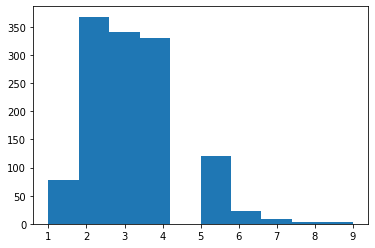

In [807]:
plt.hist(df_new['Rooms'])

In [808]:
df = df_final

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we are to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [809]:
# Separate the features from the response
X_names = [col for col in df.columns if col != 'Price']
X = df[X_names]
y = df['Price']
# # Import the scaling module
# from sklearn.preprocessing import StandardScaler
# # Create standardization object
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled = pd.DataFrame(X_scaled, columns=X_names)
# X_scaled.head()
X_scaled = X

In [810]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.20,
                                                    random_state=1,
                                                    )

In [811]:
# split data
y = df[:len(df)][['Price']]
X = X_scaled[:len(df)]

X_train = df[:len(df)].drop('Price',axis=1)

#Ignore for now. Will be used when model is built and ready to be tested
X_test = df[len(df):].drop('Price',axis=1) 
# x_test = df_test 

### 5.1 Selecting the proper regression model
The model will now be loaded. We will use eight (8) distinct models for this project, including XGBRegressor, ElasticNet, KNeighborsRegressor, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor, and ExtraTreesRegressor. Finally, the SuperLearner regression model will be used to iterate through these models and construct a model that summarizes their performance, resulting in a superior model that should outperform all others.

### 5.1.1 SuperLearner Regression Model

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs41688-019-0030-0/MediaObjects/41688_2019_30_Fig1_HTML.png"
     alt="Super learner Regression Model"
     style="float: center; padding-bottom=0.5em"
     width=600px/>
Super learner Regression Model
</div>

In [812]:
# create a list of base-models
def get_models():
    models = list()
    models.append(XGBRegressor(booster="gbtree",eta=0.2,eval_metric= "rmse", n_estimators=1000))
    models.append(ElasticNet())
    models.append(KNeighborsRegressor())
    models.append(AdaBoostRegressor())
    models.append(BaggingRegressor(n_estimators=300))
    models.append(RandomForestRegressor(n_estimators=10))
    models.append(ExtraTreesRegressor(n_estimators=300))
    return models
 
# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
    meta_X, meta_y = list(), list()
    # define split of data
    kfold = KFold(n_splits=10, shuffle=True)
    # enumerate splits
    for train_ix, test_ix in kfold.split(X):
        fold_y_pred = list()
        # get data
        train_X, test_X = X.iloc[train_ix], X.iloc[test_ix]
        train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
        meta_y.extend(test_y.values.ravel())
        # fit and make predictions with each sub-model
        for model in models:
            model.fit(train_X, train_y.values.ravel())
            y_pred = model.predict(test_X)
            # store columns
            fold_y_pred.append(y_pred.reshape(len(y_pred),1))
        # store fold y_pred as columns
        meta_X.append(hstack(fold_y_pred))
    return vstack(meta_X), asarray(meta_y)
 
# fit all base models on the training dataset
def fit_base_models(X, y, models):
    for model in models:
        model.fit(X, y.values.ravel())
 
# fit a meta model
def fit_meta_model(X, y):
    model = Lasso(alpha=1e-15)
    model.fit(X, y)
    return model
 
# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
    for model in models:
        y_pred = model.predict(X)
        mse = mean_squared_error(y, y_pred)
        print('%s: RMSE %.3f' % (model.__class__.__name__, sqrt(mse)))
 
# make predictions with stacked model
def super_learner_predictions(X, models, meta_model):
    meta_X = list()
    for model in models:
        y_pred = model.predict(X)
        meta_X.append(y_pred.reshape(len(y_pred),1))
    meta_X = hstack(meta_X)
    # predict
    return meta_model.predict(meta_X)

In [813]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=1)
print('Train', X_train.shape, y_train.shape, 'Test', X_test.shape, y_test.shape)

Train (1017, 2) (1017, 1) Test (255, 2) (255, 1)


In [814]:
# get models
models = get_models()

In [815]:
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X_train, y_train, models)
print('Meta ', meta_X.shape, meta_y.shape)

Meta  (1017, 7) (1017,)


In [816]:
# fit base models
fit_base_models(X_train, y_train, models)
# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)

In [817]:
# evaluate base models
evaluate_models(X_test, y_test, models)

XGBRegressor: RMSE 127852.808
ElasticNet: RMSE 125457.463
KNeighborsRegressor: RMSE 126299.086
AdaBoostRegressor: RMSE 126569.203
BaggingRegressor: RMSE 127380.634
RandomForestRegressor: RMSE 126858.088
ExtraTreesRegressor: RMSE 127795.921
